<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales (ANN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

### **Objetivos**
*   Estudiar el dataset de mnist que contiene 70.000 imagenes de números escritos a mano.
* Visualizar las imágenes a analizar.
* Normalizar la imágenes.
* Comprende el proceso de flatten para transformar las imágenes en un vector de 1 dimension.
* Transformar la salida a categorical.
* Construir, entrenar y evaluar al modelo con una Red Neuronal.
* Validar el modelo con una imagen externa.

In [1]:
#Librerias a implementar
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

import matplotlib.image as mpimg 

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### `MNIST dataset`
Contiene 70.000 imagenes de números escritos a mano (números del 0 al 9, 10 dígitos). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el dígito que representa la imagen en cuestión, un número de 0 al 9


## Código de carga del dataset mnist

In [2]:
# Importar mnist de keras.datasets
from keras.datasets import mnist

# Leer el dataset de mnist.
# Viene con los datos separados para entrenar y evaluar.
# De objeto importado  "mnist" utilizar el método load_data()
(data_X_train, data_y_train), (data_X_test, data_y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Visualizar las primeras 50 imágenes del dataset

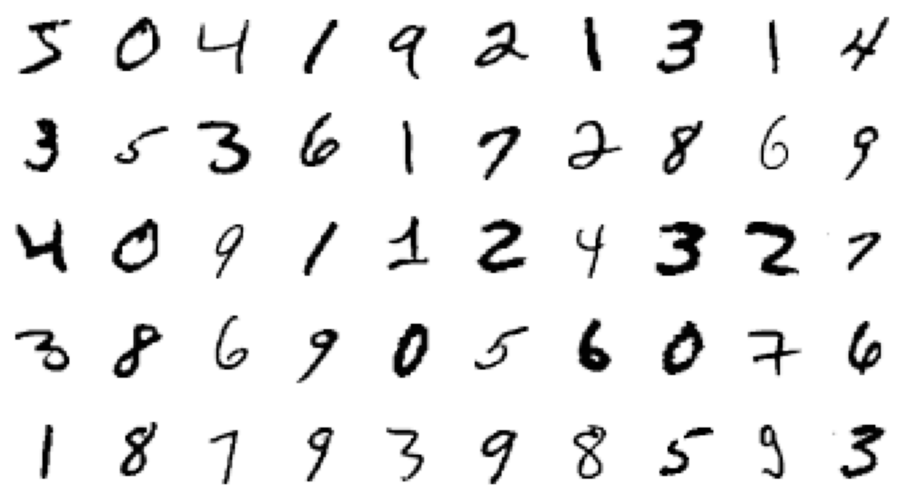

In [3]:
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujo
fig = plt.figure(figsize=(16,9))

# Bucle que itera 50 veces para mostrar las primeras 50 imágenes del dataset
for i in range(50):
    
    # ax gráfico que mostrará las imágenes en 5 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(5, 10, i+1)
    
    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Muestra las 50 imágenes de la variable data_X_train en el espacio del dibujo
    plt.imshow(data_X_train[i], cmap='Greys')

# Muestra la figura
plt.show()

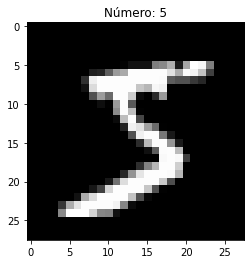

In [4]:
# plt, alias de Matplotlib 
# Muestra la primer imagen (data_X_train[0] )de la variable data_X_train en el espacio del dibujo.
# cmap='gray', escala de grises
plt.imshow(data_X_train[0], cmap='gray')

# Agrega título concatenando el número a mostrar de la primer posición
plt.title("Número: " + str(data_y_train[0]))

# Muestra la imagen
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [5]:
# Muetsra las dimensiones de la primer imagen
data_X_train[0].shape

(28, 28)

In [6]:
# Observar como está representada la imagen, ver fila del medio (14)
# data_X_train[0] información de la primer imagen
# [14, :] muestra la fila 14 y todas las columnas (:)
print(data_X_train[0][14, :])

[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
  25   0   0   0   0   0   0   0   0   0]


In [7]:
# Por los resultados podemos ver que la imagen está representada de 0 a 255
# Normalizamos los datos para que se encuentren entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [8]:
# shape[0], devuelve cantidad de datos en observacion de la primer imagen.
print('Cantidad de datos en observacion:', X_train_norm.shape[0])

Cantidad de datos en observacion: 60000


In [9]:
# Muetsra las dimensiones de la primer imagen normalizada.
print('Tamaño de la imagen:', X_train_norm[0].shape)

Tamaño de la imagen: (28, 28)


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [10]:
# Observar el los primeros 10 datos del dataset de y_train
# data_y_train almacena los números --> 5 0 4, no imágenes
print(data_y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


## Exploramos los primeros diez 8 del dataset para train

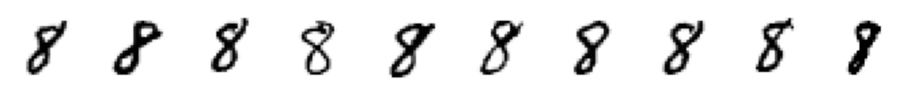

In [11]:
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujo
fig = plt.figure(figsize=(16,9))

#contador
j = 0

# Itera 10 veces
for i in range(10):

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, i+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Bucle que verifica que la imagen sea igual a 8
    while True:
        if data_y_train[j] == 8:

            # Muestra la imagen con escala de grises
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

## Exploramos los primeros diez 8 del dataset para test

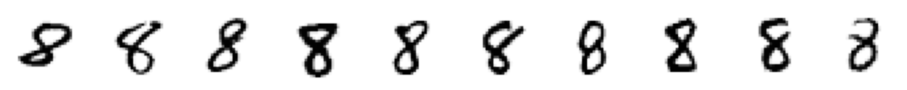

In [12]:
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujo
fig = plt.figure(figsize=(16,9))

#contador
j = 0

# Itera 10 veces
for i in range(10):

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, i+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Bucle que verifica que la imagen sea igual a 8
    while True:
        if data_y_test[j] == 8:
                        
            # Muestra la imagen en escala de grises
            ax.imshow(X_test_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
**Nota:** Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [13]:
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension
# shape devuelve filas y columnas
# Multiplica las filas por columnas (X_train_norm.shape[1] * X_train_norm.shape[2])
num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

# X_train_norm.reshape(X_train_norm.shape[0], num_pixels) Ajusta el array a dos dimensiones
# Tipo de dato (astype('float32'))
X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

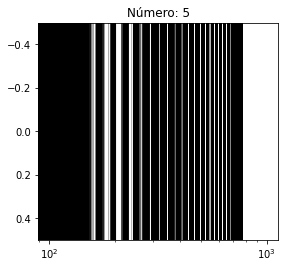

In [14]:
# ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()

# Muestra la primer imagen de X_train con un ajuste .reshape(-1,1) y con escala de grises
ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')

# Escala de números en el eje de las x como potencia de base 10
ax.set_xscale("log")

# Agrega titulo
plt.title("Número: " + str(data_y_train[0]))

# Muetra la imagen
plt.show()

In [15]:
# Devuelve información de la imagen.
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [16]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [17]:
# Transformar la salida a oneHotEncoding con to_categorical
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

# Muestra los 10 primeros to_categorical
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
# input shape (almacena la cantidad de pixeles de las imagen)
in_shape = X_train.shape[1]
in_shape

784

In [19]:
# output shape, almacena la cantidad de número identificados en el dataset.
out_shape = y_train.shape[1]
out_shape

10

In [20]:
# Se importa Dense de la librería tensorflow.keras.layers
from keras.layers import Dense

# Se crea el objeto model a partir de la clase Sequential()
model = Sequential()

# Se crea la capa de entrada y la capa oculta de la red, que tendrá:
# --> tantas entradas (input_shape) como columnas (in_shape)
# --> tantas neuronas como deseemos (units)
# --> utilizamos "sigmoid" como capa de activación
model.add(Dense(units=128, activation='sigmoid', input_shape=(in_shape,)))

# Se crea la capa de salida, que tendrá tantas neuronas como salidas posibles
# Se implementa 'softmax' ya que la salida es multiple
model.add(Dense(units=out_shape, activation='softmax'))

# Configuración del modelo para el entrenamiento, implementando el método compile a partir del modelo creado.
# Se necesita indicar los parámetros:
# optimizer, nombre del optimizador (es el algoritmo que se encarga del descenso de gradiente estocástico)
# Fuente: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
# loss, se llama función de pérdida, representa las categorías conocidas de las predicción. Al ser 'categorical_crossentropy' 
#la predicción tiene una salida con varias opciones.
# metrics, se define la métrica que evaluará el modelo durante el entrenamiento y las pruebas.
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Resumen de la estructura de la red neuronal.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Se entrena el modelo con el método fit
# Necesita definir los valores para X_train, y_train sumado a la cantidad de épocas que seria la iteraciones de entrenamiento.
# dirigido a validación (validation_split=0.2)
# batch_size, tamaño del lote a entrenar.
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6629 - accuracy: 0.8465 - val_loss: 0.3323 - val_accuracy: 0.9125
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3037 - accuracy: 0.9163 - val_loss: 0.2533 - val_accuracy: 0.9298
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.9305 - val_loss: 0.2174 - val_accuracy: 0.9404
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.9411 - val_loss: 0.1929 - val_accuracy: 0.9473
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1817 - accuracy: 0.9485 - val_loss: 0.1758 - val_accuracy: 0.9520
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1598 - accuracy: 0.9547 - val_loss: 0.1603 - val_accuracy: 0.9553
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1419 - accuracy: 0.9600 - val_loss: 0.1518 - val_accuracy: 0.9563
Epoch 

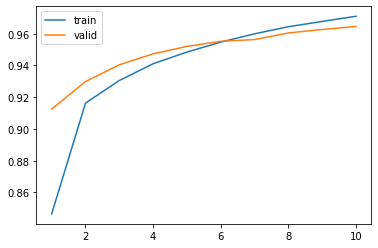

In [23]:
# Variable epoch_count, que almacena en una lista la cantidad de épocas de train
# history, es la variable que almacena las predicciones del modelo
# y de ella, se puede acceder a información como su historial (history) del accuracy
epoch_count = range(1, len(history.history['accuracy']) + 1)

# De Seaborn (sns) se accede al gráfico de línea para representar;
# Por un lado, el 'accuracy',
# Por el otro, la validación (val_accuracy)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [24]:
# Variable y_hat_prob que almacena las probabilidades de las predicciones
# con los datos de evaluación
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

array([[8.3413670e-06, 1.7010246e-06, 2.4566366e-04, 1.1390116e-03,
        3.8576451e-07, 2.7714996e-05, 5.7787690e-09, 9.9834490e-01,
        6.7354958e-06, 2.2546890e-04],
       [1.9274629e-04, 9.1819204e-03, 9.8831522e-01, 5.8318739e-04,
        8.4810248e-09, 1.2635627e-03, 4.3111260e-04, 1.4918829e-08,
        3.1965650e-05, 3.1139459e-07],
       [1.1050196e-06, 9.9359679e-01, 2.1738822e-03, 5.4383656e-04,
        4.0109844e-05, 3.3853384e-04, 1.9380588e-04, 2.2769568e-03,
        8.1619690e-04, 1.8779232e-05]], dtype=float32)

In [25]:
# Muestra las clasificación de cada imagen, de acuerdo a la probabilidad más alta.
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat[:3]

array([7, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [26]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 0s 725us/step - loss: 0.1184 - accuracy: 0.9656


0.9656000137329102

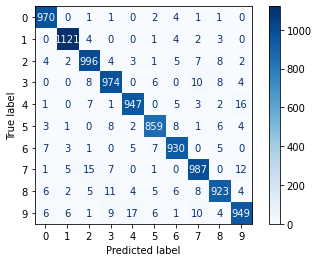

In [27]:
# Se utiliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix 
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))

# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd.plot(cmap=plt.cm.Blues)

# Mostrar la figura
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Es hora de buscar los peores dígitos calificados!<br>
__NOTA__: No se entrará en detalle sobre el codigo utilizado en la función "ranking_peores". Se utilizó una vez para obtener los candidatos para evaluar de forma permanente de aquí en más en diferentes ensayos o notebooks. Los índices ahora se encuentran hardcodeados (invariantes y escritos en el código)

__NOTA__: De aquí es más es importante que el alumno pueda continuar el análisis, teniendo en consideración que "ranking_10" posee los indices de los peores 10 clasificados. Esos índices se utilizarán en otros notebooks

In [28]:
# Ubicación de los peores ochos
ranking_10 = [8183, 6765, 8522, 1325, 582, 9280, 5749, 3567, 3206, 9744]

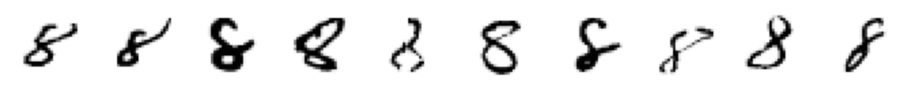

In [29]:
# Espacio para dibujar
fig = plt.figure(figsize=(16,9))

# Contador
j = 0

for i in ranking_10:

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, j+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Muestra la imagen en escala de grises
    ax.imshow(X_test_norm[i], cmap='Greys')
    j += 1

plt.show()

In [30]:
# Obtener el vector de entrada para evaluar
# Ubica el vector de cada imagen por su ubicación
X_test_peores = X_test[ranking_10]

# Muestra la cantidad de números y los pixeles de cada uno
X_test_peores.shape

(10, 784)

In [31]:
# Ubica el número que corresponde a cada imagen por su ubicación
y_test_peores = y_test[ranking_10]
y_test_peores.shape

(10, 10)

In [32]:
# Calcular la exactitud
score = model.evaluate(X_test_peores, y_test_peores)
score[1]

1/1 [==============================] - 0s 1ms/step - loss: 2.3902 - accuracy: 0.1000


0.10000000149011612

In [33]:
# ¿Qué es lo que el sistema ve?
# Predicción
y_hat_prob_peores = model.predict(X_test_peores)

# Ubica de acuerdo a la probabilidad más alta cuál es el número que le corresponde.
y_hat_peores = np.argmax(y_hat_prob_peores,axis=1)
y_hat_peores

array([5, 8, 6, 6, 2, 5, 6, 5, 3, 1])

#### La idea es dibujar el número 8 en paint, con tamaño 28 pixeles
#### Guardar la imagen.
#### Subirla al Colab para leerla en el Notebook

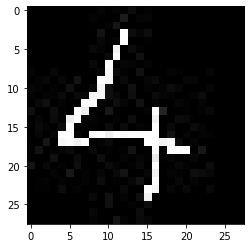

In [38]:
img1 = mpimg.imread('/content/cuatro.jpg')
plt.imshow(img1)
plt.show()

In [39]:
img1.shape

(28, 28, 3)

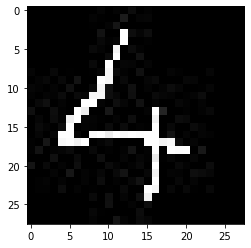

In [40]:
# Debemos ahora quitar los canales de color para que sea en escala de grises
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Se invoca la función
gray = rgb2gray(img1)    

# cmap='gray', variación de colores en grises, indicando los valores máximo y mínimo de la escala de colores.
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [42]:
# Nuestra nueva imagen tiene las siguientes dimensiones
gray.shape

(28, 28)

In [45]:
# Modificando las dimensiones de la imagen para que sea 28x28
# (en caso de que sobre pixeles)
copi_img = gray[:28,:28]
copi_img.shape

(28, 28)

In [46]:
# Preprocesar la imagen
# Normalizar
img_norm = copi_img / 255.0

# Calcular el número de pixeles de la imagen.
num_pixel = img_norm.shape[0] * img_norm.shape[1]
num_pixel

784

In [47]:
# Ajustar la imagen en una fila (flatten)
img_prueba = img_norm.reshape((-1,num_pixel)).astype('float32')
img_prueba.shape

(1, 784)

In [48]:
prediccion = model.predict([img_prueba])
prediccion[0]

array([7.9439761e-04, 7.8562378e-05, 1.7836763e-02, 3.0288048e-04,
       9.1927081e-01, 3.0258864e-02, 2.0695802e-02, 3.0997426e-03,
       7.0392818e-04, 6.9582304e-03], dtype=float32)

In [49]:
# Muestra las clasificación de cada imagen, de acuerdo a la probabilidad más alta.
y_prediccion = np.argmax(prediccion,axis=1)
y_prediccion[0]

4

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar un modelo clásico de redes neuronales (ANN) de una sola capa oculta vemos que el modelo es ineficiente en clasificar aquellos dígitos o números que no están compuestos por rectas y tienen mayor cantidad de curvas. <br>
Este modelo además es incapaz de manejar imagenes a color debido a la necesidad del proceso de flatten.